11490434/11490434 [==============================] - 0s 0us/step

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier on Validation Data...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions on Validation Data...

Creating Confusion Matrix for Validation Data...

KNN Trained Classifier Confidence:  0.9711666666666666

Predicted Values:  [5 3 1 ... 6 9 1]

Accuracy of Classifier on Validation Image Data:  0.9711666666666666

Confusion Matrix: 
 [[541   0   1   0   0   2   3   0   0   1]
 [  0 655   1   1   0   0   0   0   0   0]
 [  4   3 604   3   1   0   1   7   1   1]
 [  0   3   3 614   0   5   0   2   7   2]
 [  0   4   0   1 585   0   4   0   0  12]
 [  0   2   1   3   1 538   4   1   1   2]
 [  2   0   0   0   0   3 560   0   0   0]
 [  1   7   1   0   1   0   0 633   0   7]
 [  2   7   0   8   1   

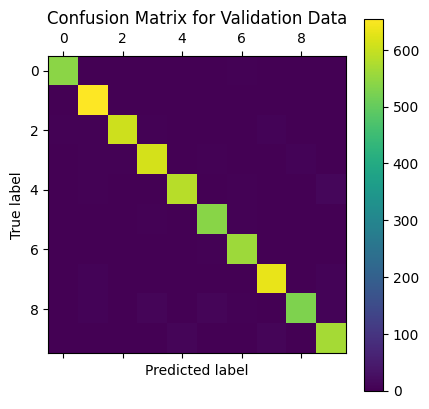


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9681

Confusion Matrix for Test Data: 
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  990    2    0    0    2   16    3    0]
 [   0    3    4  976    1   13    0    7    4    2]
 [   3    9    0    0  937    0    4    2    1   26]
 [   6    0    0   13    2  862    5    1    1    2]
 [   6    2    0    0    3    2  945    0    0    0]
 [   0   23    5    0    3    0    0  988    0    9]
 [   8    3    5   15    5   12    5    4  912    5]
 [   5    7    2   10    8    2    1    8    2  964]]


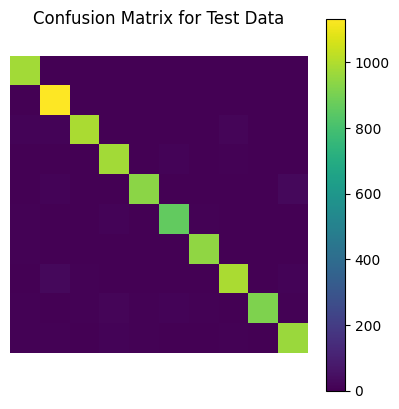

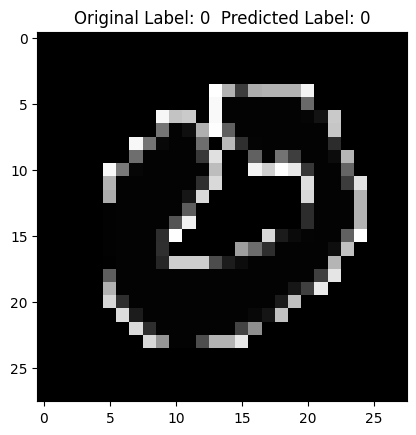

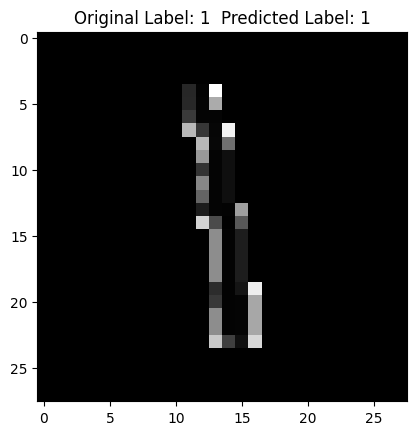

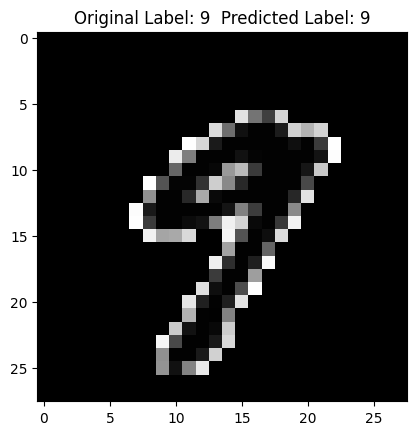

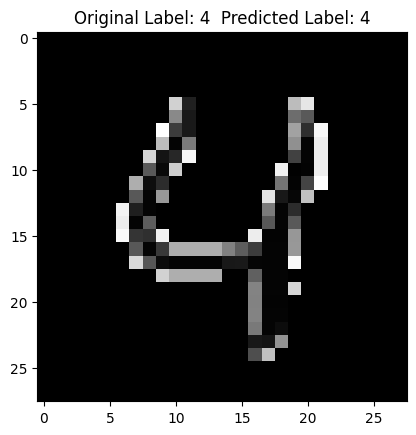

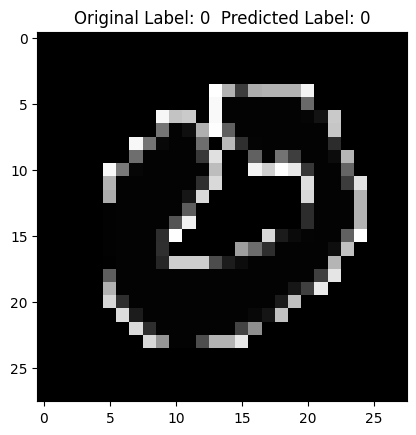

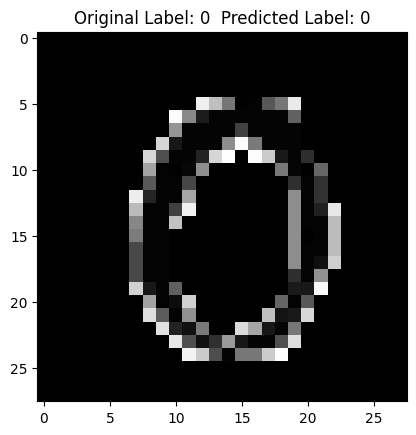

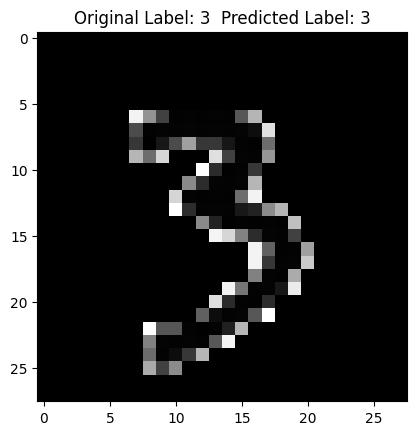

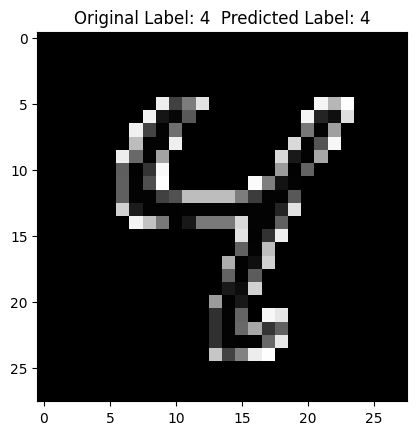

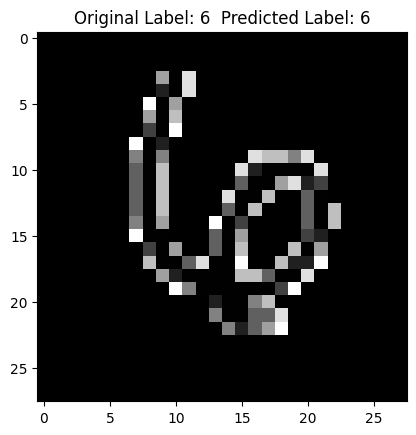

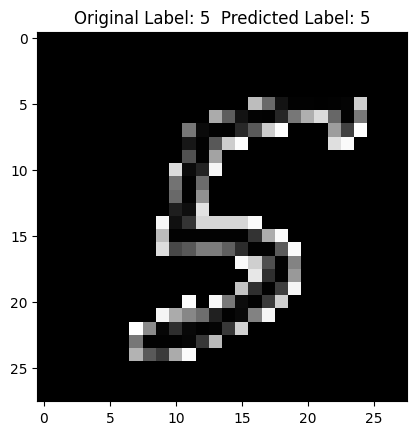

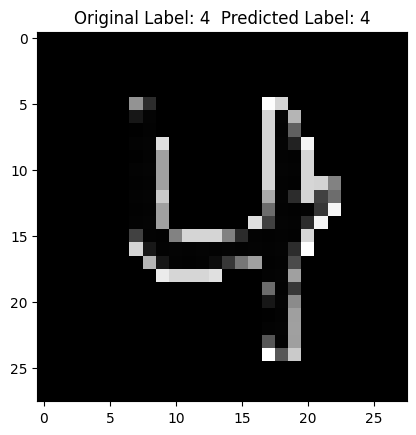

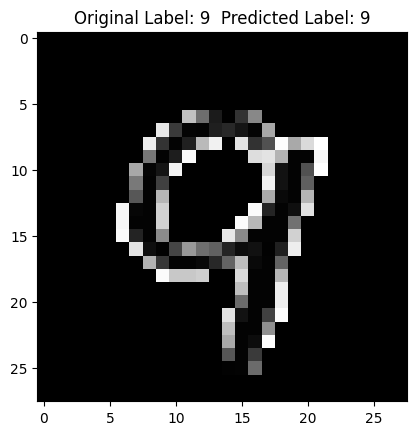

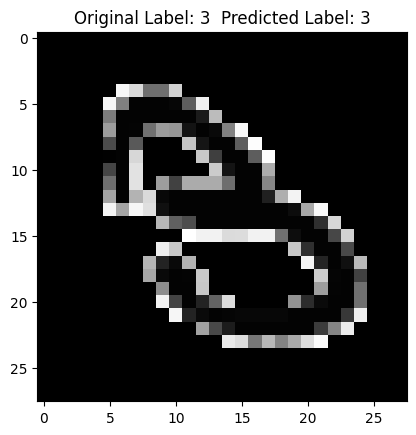

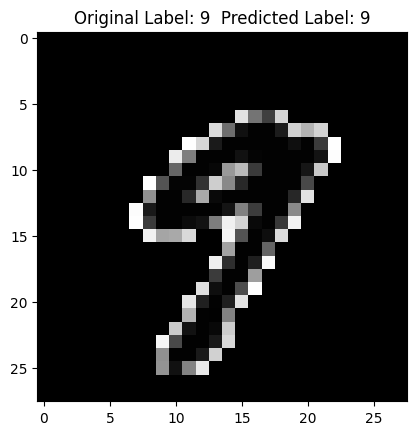

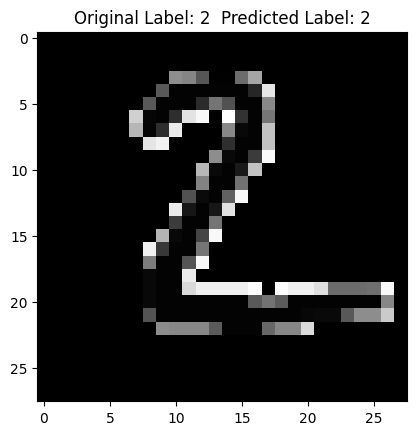

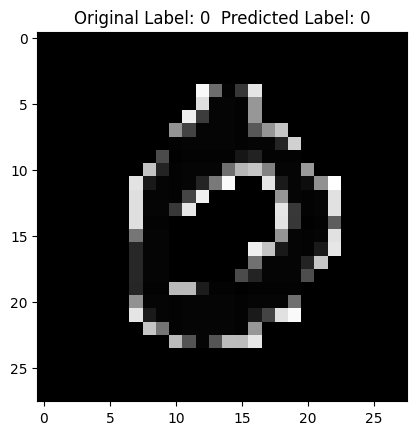

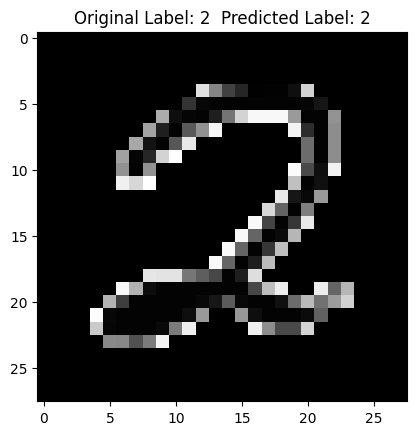

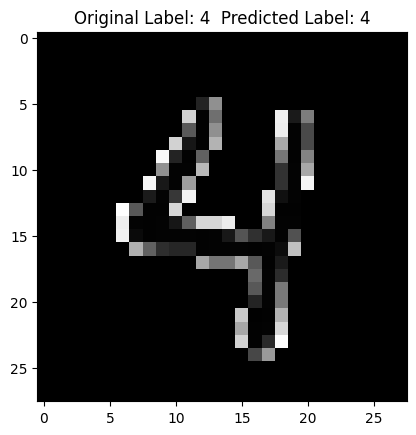

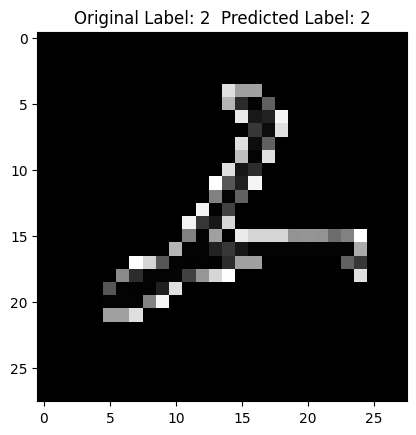

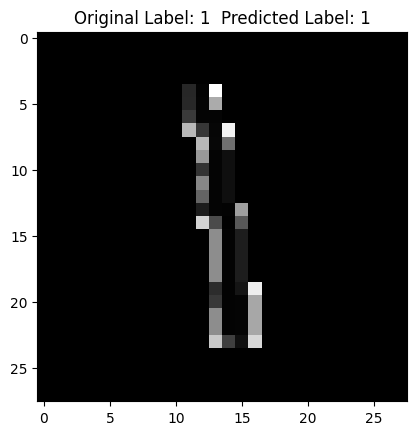

In [4]:

import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert the labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1)

print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)

with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier on Validation Data...')
confidence = clf.score(X_val, y_val)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_val)

print('\nCalculating Accuracy of Predictions on Validation Data...')
accuracy = accuracy_score(y_val, y_pred)

print('\nCreating Confusion Matrix for Validation Data...')
conf_mat = confusion_matrix(y_val, y_pred)

print('\nKNN Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test, test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 50, 20)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
